In [ ]:
! pip install dxcam

Screenshot time: 0.08118629455566406


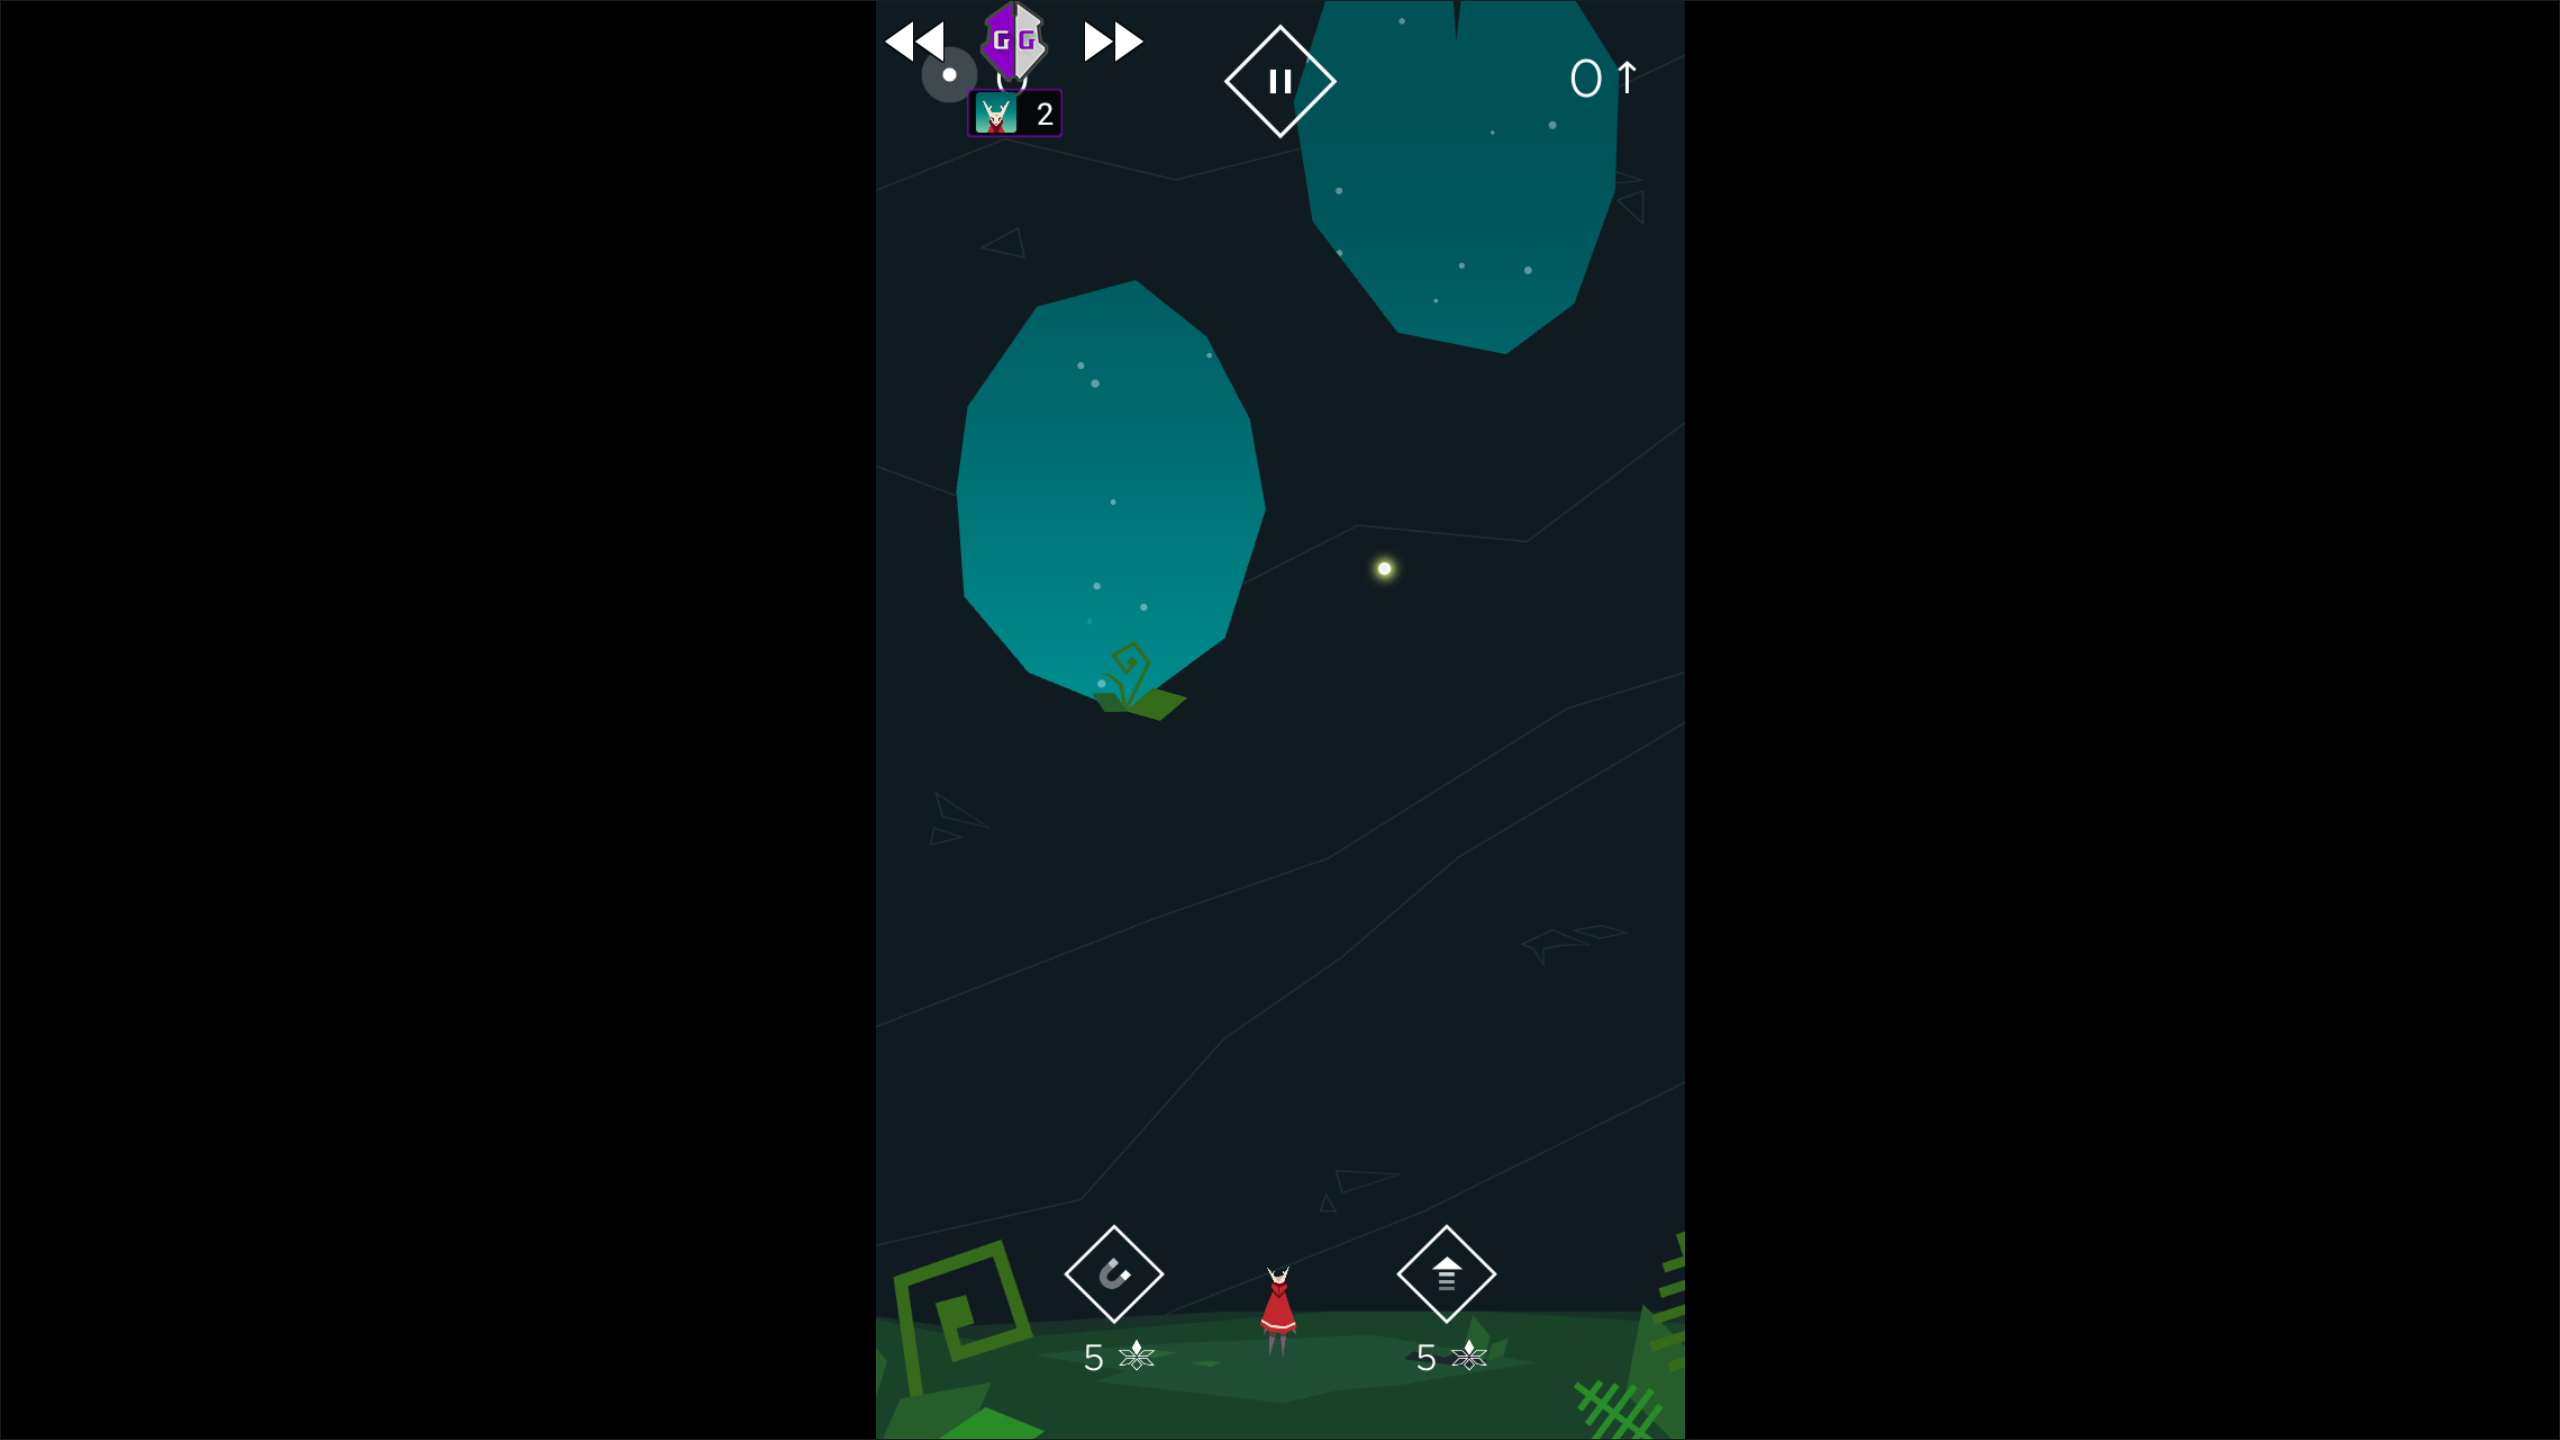

In [11]:
import pyautogui
import numpy as np
import time

start = time.time()
screenshot = pyautogui.screenshot()
np_screenshot = np.array(screenshot)

end = time.time()
print(f"Screenshot time: {end - start}")
screenshot

In [5]:
import dxcam

print(dxcam.device_info())
print(dxcam.output_info())

Device[0]:<Device Name:NVIDIA GeForce RTX 3050 Ti Laptop GPU Dedicated VRAM:3962Mb VendorId:4318>

Device[0] Output[0]: Res:(2560, 1440) Rot:0 Primary:True
Device[0] Output[1]: Res:(2560, 1440) Rot:0 Primary:False



In [ ]:
import dxcam
import numpy as np
import pyautogui
from PIL import Image
import time

N = 10

width, height = pyautogui.size()
print(width, height)

dist_from_center = 9 * height / 32
screen_center = width/2

start_width = int(screen_center - dist_from_center)
end_width = int(screen_center + dist_from_center)

print(start_width, end_width)

region = (start_width, 1, end_width, height-1)
print(region)
camera = dxcam.create(region=region, output_color="GRAY", device_idx=0)

start = time.time()
screenshot = camera.get_latest_frame()
screenshot_display = Image.fromarray(screenshot.squeeze())
end = time.time()
print(f"Screenshot time: {end - start}")

del camera 
screenshot_display

In [42]:
screenshot_display.size

(810, 1438)

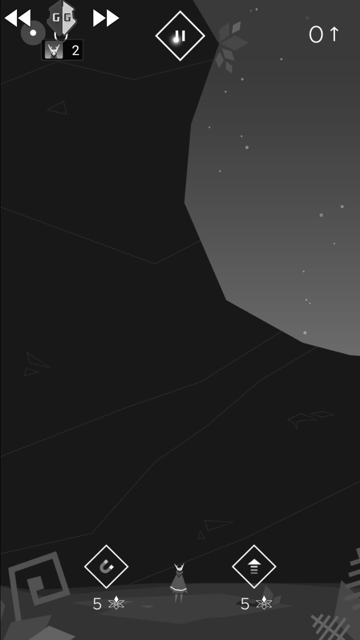

In [21]:
dest_size = (360, 640)
resized_screenshot = screenshot_display.resize(dest_size)
resized_screenshot

In [25]:
camera = dxcam.create(region=region, output_color="GRAY")
dest_size = (360, 640)

def make_screenshot():
    screenshot = camera.grab()
    screenshot_display = Image.fromarray(screenshot.squeeze())
    resized_screenshot = screenshot_display.resize(dest_size)
    return resized_screenshot


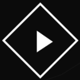

In [80]:
screenshot = make_screenshot()
play_x, play_y = 180, 486
d = 40
x_start, x_end, y_start, y_end = play_x - d, play_x + d, play_y - d, play_y + d
cropped_image = screenshot.crop((x_start, y_start, x_end, y_end))
cropped_image

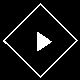

In [81]:
cropped_image_np = np.array(cropped_image)
cropped_image_np_mask = np.where(cropped_image_np > 200, 255, 0).astype('uint8')
play_button_image = Image.fromarray(cropped_image_np_mask)
play_button_image

In [82]:
play_button_image.save("base_images/play_button_bin_v2.png")

In [87]:
def extract_whites(image):
    image_np = np.array(image)
    image_np_mask = np.where(image_np > 200, 255, 0).astype('uint8')
    return image_np_mask

In [102]:
def is_endgame_screen(screenshot: Image, play_image_pattern: Image, possible_fails:int = 50):
    possible_fails = 100
    play_x, play_y = 180, 486
    d = 40
    x_start, x_end, y_start, y_end = play_x - d, play_x + d, play_y - d, play_y + d
    cropped_image = screenshot.crop((x_start, y_start, x_end, y_end))
    screenshot_wo_np = extract_whites(cropped_image)
    
    play_image_pattern_np = np.array(play_image_pattern).astype('uint8')
    bool_mask = screenshot_wo_np == play_image_pattern_np
    if np.sum(bool_mask == False) < possible_fails:
        return True

    return False

In [110]:
is_endgame_screen(make_screenshot(), play_button_image)

True

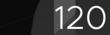

In [126]:
screenshot = make_screenshot()

x_start, x_end, y_start, y_end = 120, 230, 275, 310
cropped_image = screenshot.crop((x_start, y_start, x_end, y_end))
cropped_image

In [128]:
cropped_image.size

(110, 35)

In [113]:
import easyocr
reader = easyocr.Reader(['en'])

def extract_results_from_ss(screenshot, reader=reader):
    x_start, x_end, y_start, y_end = 120, 230, 275, 310
    result_img = screenshot.crop((x_start, y_start, x_end, y_end))
    result = reader.readtext(np.array(result_img))
    numbers = ''.join([text[1] for text in result if text[1].isdigit()])

    try:
        numbers = int(numbers)
        return numbers
    except:
        return -1

In [127]:
extract_results_from_ss(make_screenshot())

120

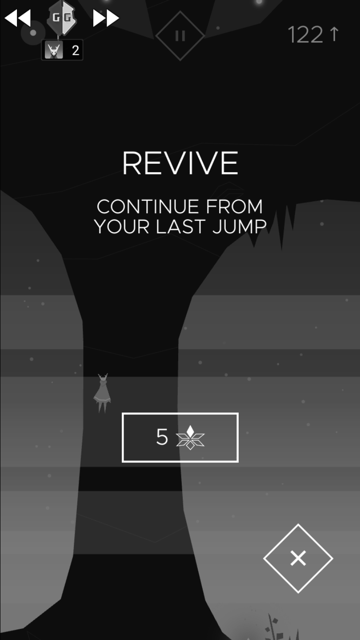

In [117]:
screenshot = make_screenshot()
screenshot

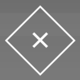

In [118]:
close_x, close_y = 298, 558
d = 40
x_start, x_end, y_start, y_end = close_x - d, close_x + d, close_y - d, close_y + d
cropped_image = screenshot.crop((x_start, y_start, x_end, y_end))
cropped_image

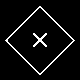

In [119]:
close_button_image = Image.fromarray(extract_whites(cropped_image))
close_button_image

In [120]:
close_button_image.save("base_images/close_button_bin_v2.png")

In [123]:
def is_revive_screen(screenshot: Image, close_image_pattern: Image, possible_fails:int = 50):
    possible_fails = 100
    close_x, close_y = 298, 558
    d = 40
    x_start, x_end, y_start, y_end = close_x - d, close_x + d, close_y - d, close_y + d
    cropped_image = screenshot.crop((x_start, y_start, x_end, y_end))
    screenshot_wo_np = extract_whites(cropped_image)
    
    close_image_pattern_np = np.array(close_image_pattern).astype('uint8')
    bool_mask = screenshot_wo_np == close_image_pattern_np
    if np.sum(bool_mask == False) < possible_fails:
        return True

    return False

In [124]:
is_revive_screen(make_screenshot(), close_button_image)

True

In [138]:
screenshot = make_screenshot()
x_start, x_end, y_start, y_end = 265, 325, 22, 46
tmp_result = screenshot.crop((x_start, y_start, x_end, y_end))
tmp_result

In [139]:
tmp_result.size

(60, 24)

In [147]:
import easyocr
import pyautogui
import random
import time
import threading
import numpy as np
from PIL import Image


class FernFlowerEnv():
    def __init__(self, close_image_path: str, play_image_path: str, game_speed: int = 1):
        self.reader = easyocr.Reader(['en'])
        self.dest_ss_size = (360, 640)
        self.close_image_pattern_np = np.array(Image.open(close_image_path)).astype('uint8')
        self.close_button_center = (298, 558)
        self.play_image_pattern_np = np.array(Image.open(play_image_path)).astype('uint8')
        self.play_button_center = (180, 486)
        self.d = 40
        self.accepted_fails = 80
        
        screen_width, screen_height = pyautogui.size()
        self.play_button_position = (int(0.5 * screen_width), int(0.75 * screen_height))
        self.close_button_position = (int(0.6 * screen_width), int(0.87 * screen_height))

        self.game_speed = game_speed
        self.jump_time_dict = {
            'no_jump': 0,
            'short': 0.05/game_speed,
            'medium': 0.15/game_speed,
            'long': 0.3/game_speed
        }

        self.jump_time_codes = list(self.jump_time_dict.keys()) 
        self.directions = ['left', 'right']
        self.reload_gui_time_buffer = 1/game_speed

        self.curr_result_img = np.zeros((24, 60))
        self.result_changes = 0
        self.screenshots_wo_change = 0
        self.stuck_game_threshold = 50
        
        self.camera = self._setup_camera()

    def _setup_camera(self):
        width, height = pyautogui.size()    
        dist_from_center = 9 * height / 32 # 16:9 display proprtions
        screen_center = width/2
        start_width = int(screen_center - dist_from_center)
        end_width = int(screen_center + dist_from_center)        
        region = (start_width, 1, end_width, height-1)
        camera = dxcam.create(region=region, output_color="GRAY")
        return camera

    def take_screenshot(self):
        screenshot = self.camera.grab()
        screenshot_display = Image.fromarray(screenshot.squeeze())
        resized_screenshot = screenshot_display.resize(dest_size)
        return resized_screenshot

    @staticmethod
    def extract_whites(image):
        image_np_mask = np.where(np.array(image) > 200, 255, 0).astype('uint8')
        return image_np_mask
        
    def extract_results_from_ss(self, screenshot):
        x_start, x_end, y_start, y_end = 120, 230, 275, 310
        result_img = screenshot.crop((x_start, y_start, x_end, y_end))
        result = self.reader.readtext(np.array(result_img))
        numbers = ''.join([text[1] for text in result if text[1].isdigit()])
    
        try:
            numbers = int(numbers)
            return numbers
        except:
            return -1

    def compare_image_with_pattern(self, cropped_image_np, pattern_np):
        screenshot_wo_np = self.extract_whites(cropped_image_np)
        bool_mask = screenshot_wo_np == pattern_np
        if np.sum(bool_mask == False) < self.accepted_fails:
            return True
        return False

    def is_result_changed(self, screenshot: Image):
        x_start, x_end, y_start, y_end = 265, 325, 22, 46
        tmp_result = screenshot.crop((x_start, y_start, x_end, y_end))
        tmp_result_np = self.extract_whites(tmp_result)
        if not self.compare_image_with_pattern(tmp_result_np, self.curr_result_img):
            self.curr_result_img = tmp_result_np
            self.result_changes += 1
            self.screenshots_wo_change = 0
            return True

        else:
            self.screenshots_wo_change += 1
            return False

    def is_revive_screen(self, screenshot: Image, possible_fails:int = 80):
        close_x, close_y = self.close_button_center
        x_start, x_end, y_start, y_end = close_x - self.d, close_x + self.d, close_y - self.d, close_y + self.d
        cropped_image_np = screenshot.crop((x_start, y_start, x_end, y_end))
        return self.compare_image_with_pattern(cropped_image_np, self.close_image_pattern_np)

    def is_endgame_screen(self, screenshot: Image, possible_fails:int = 80):
        play_x, play_y = self.play_button_center     
        x_start, x_end, y_start, y_end = play_x - self.d, play_x + self.d, play_y - self.d, play_y + self.d 
        cropped_image_np = screenshot.crop((x_start, y_start, x_end, y_end))
        return self.compare_image_with_pattern(cropped_image_np, self.play_image_pattern_np)

    @staticmethod
    def click(coordinates):
        pyautogui.click(*coordinates)
    
    def jump(self, direction, time_code):
        jump_time_float = self.jump_time_dict[time_code]
        pyautogui.keyDown(direction)
        time.sleep(jump_time_float)
        pyautogui.keyUp(direction)

    def jump_in_background(self, direction, time_code):
        thread = threading.Thread(target=self.jump, args=(direction, time_code))
        thread.start()
        return thread 

    def check_game_end(self):
        screenshot = self.take_screenshot()
        result_changed = self.is_result_changed(screenshot)
        
        if self.is_revive_screen(screenshot):
            self.click(self.close_button_position)
            time.sleep(self.reload_gui_time_buffer)
                
        if self.is_endgame_screen(screenshot):
            time.sleep(self.reload_gui_time_buffer)
            results_screenshot = self.take_screenshot()
            result = self.extract_results_from_ss(results_screenshot)
            self.click(self.play_button_position)
            time.sleep(self.reload_gui_time_buffer)
            return True, True, result
            
        return False, result_changed, 0

    def check_game_end_in_background(self):
        result = [None, None, None]
        def worker():
            result[0] = self.check_game_end()
        thread = threading.Thread(target=worker)
        thread.start()
        return thread, result

    def run(self):
        self.click(self.close_button_position)
        time.sleep(self.reload_gui_time_buffer)
        self.click(self.play_button_position)
        time.sleep(self.reload_gui_time_buffer)

        games_completed = 0
        while games_completed < 20:
            jump_thread = self.jump_in_background(random.choice(self.directions), random.choice(self.jump_time_codes))
            check_thread, result_container = self.check_game_end_in_background()
            jump_thread.join()
            check_thread.join()
            is_game_end, result_changed, result = result_container[0]
          
            if self.screenshots_wo_change >= self.stuck_game_threshold:
                time.sleep(2 * self.reload_gui_time_buffer) # let it die
                print("STUCKED GAME")
            
            if is_game_end:
                print(f"END GAME: [{result} pts] [{self.result_changes} result changes]")
                self.result_changes = 0
                games_completed += 1


In [ ]:
ffe = FernFlowerEnv("base_images/close_button_bin_v2.png", "base_images/play_button_bin_v2.png", 2)
ffe.run()